In [1]:
import numpy as np
import matplotlib.pyplot as plt

def predict(X):
    if (X >= 0):
        return 1
    return 0

def find_gate(gate):
    if(gate == "and"): 
        return np.array([0,0,0,1])
    if(gate == "or"): 
        return np.array([0,1,1,1])
    if(gate == "nand"): 
        return np.array([1,1,1,0])
    if(gate == "nor"): 
        return np.array([1,0,0,0])
    if(gate == "implies"): 
        return np.array([1,1,0,1])

In [4]:
# define parameters here:
eta = 1
theta = 1
dim = 2
bias = 1
epochs = 8

w = np.zeros(dim + 1) # Since W belongs to R(n+1)

train_x = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

gate = input("Enter the gate to calculate weights for : ")

train_y = find_gate(gate)

for _ in range(epochs):
    flag = False
    print("-------------Epoch",_)
    for i in range(train_y.size):
        X = np.insert(train_x[i] ,0,bias) # take bias = +1
        y = predict(X.T.dot(w))
        error = train_y[i] - y
        
        if(error != 0):
            flag = True
        
        print("X0 = ",X[0],"X1 = ",X[1]," y = ",y, " Error = ",error," ")
        w = (error*eta*X + w)
    
    if( not flag ):
        break

        
print("\n\nThe weight array is : ",w)
print("\ni.e.,   W0 = ", w[0], " \n\tW1 = ", w[1], " \n\tW2 = ",w[2])

Enter the gate to calculate weights for : or
-------------Epoch 0
X0 =  1 X1 =  0  y =  1  Error =  -1  
X0 =  1 X1 =  0  y =  0  Error =  1  
X0 =  1 X1 =  1  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  1  Error =  0  
-------------Epoch 1
X0 =  1 X1 =  0  y =  1  Error =  -1  
X0 =  1 X1 =  0  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  0  Error =  1  
X0 =  1 X1 =  1  y =  1  Error =  0  
-------------Epoch 2
X0 =  1 X1 =  0  y =  1  Error =  -1  
X0 =  1 X1 =  0  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  1  Error =  0  
-------------Epoch 3
X0 =  1 X1 =  0  y =  0  Error =  0  
X0 =  1 X1 =  0  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  1  Error =  0  
X0 =  1 X1 =  1  y =  1  Error =  0  


The weight array is :  [-1.  1.  1.]

i.e.,   W0 =  -1.0  
	W1 =  1.0  
	W2 =  1.0


x1	 x2	 q	  y	 s
--------------------------------------
0 	 0 	 0.0 	 -1.0 	 0
0 	 1 	 1.0 	 0.0 	 1
1 	 0 	 1.0 	 0.0 	 1
1 	 1 	 2.0 	 1.0 	 1


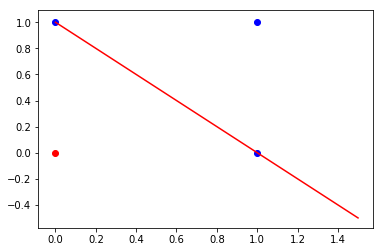

In [5]:
# To check and visualise the results :

w1 = w[1]
w2 = w[2]
w0 = w[0]
x_values = [[0,0],[0,1],[1,0],[1,1]]

X0 = []
X1 = []
print("x1\t x2\t q\t  y\t s")
print("--------------------------------------")
for x in x_values:
    x1 = x[0]
    x2 = x[1]
    q = w1*x1 + w2*x2
    y = q+w0
    if (y >= 0):
        s = 1
        X1.append([x1,x2])
    else :
        s = 0
        X0.append([x1,x2])
    print(x1, "\t",x2, "\t",q, "\t",y, "\t",s)

slope = -w1/w2
intercept = -w0/w2

for a in X0:
    plt.scatter(a[0],a[1],c='r')
for b in X1:
    plt.scatter(b[0],b[1],c='b')
x = np.linspace(0,1.5,5)
y = slope*x + intercept
plt.plot(x,y,'-r')
plt.show()